<a href="https://colab.research.google.com/github/kurtsenol/machine-learning/blob/master/TopicModeling/LDA_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import pickle

In [ ]:
df = pd.read_pickle("drive/My Drive/Topic_Modeling/topic_df.pkl")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,Title,Journal,Year,Abstract
0,TWO-DIRECTIONAL CONVERGENCE OF PLATFORM AND PI...,JOURNAL OF SERVICE MANAGEMENT,2020,PURPOSE THIS ARTICLE EXAMINES THE NEW PHENOMEN...
1,EMPLOYEE WELLNESS ON THE FRONTLINE: AN INTERAC...,JOURNAL OF SERVICE MANAGEMENT,2020,PURPOSE EMPLOYEE WELLNESS IS VITAL TO CREATING...
2,DEMOGRAPHIC AND ATTITUDINAL ANTECEDENTS OF CON...,JOURNAL OF SERVICE MANAGEMENT,2020,PURPOSE TO INVESTIGATE IF ONLINE TV CONTENT PL...
3,MORE THAN A FEELING? TOWARD A THEORY OF CUSTOM...,JOURNAL OF SERVICE MANAGEMENT,2020,PURPOSE RESPONDING TO AN INCREASING CALL FOR A...
4,ACCOUNTABLE ALGORITHMS? THE ETHICAL IMPLICATIO...,JOURNAL OF SERVICE MANAGEMENT,2020,PURPOSE THE PURPOSE OF THIS STUDY IS TO IDENTI...
...,...,...,...,...
11380,TOURIST INFORMATION SEARCH AND DESTINATION CHO...,TOURISM MANAGEMENT PERSPECTIVES,2012,THIS STUDY PROVIDES EMPIRICAL EVIDENCE OF SELF...
11381,TOURISTS' OPINIONS AND THEIR SELECTION OF TOUR...,TOURISM MANAGEMENT PERSPECTIVES,2012,IMAGE IS AN IMPORTANT COMPONENT OF TOURISM DES...
11382,TOWARDS A COMMON AGENDA FOR THE DEVELOPMENT OF...,TOURISM MANAGEMENT PERSPECTIVES,2012,BUILDING ON CASE STUDIES OF FOUR EUROPEAN REGI...
11383,TOWARDS TOURISM INNOVATION: A CRITICAL REVIEW ...,TOURISM MANAGEMENT PERSPECTIVES,2012,UNDERSTANDING AND MANAGING THE RURAL TOURISM E...


In [ ]:
papers = list(df.Abstract.values)

In [ ]:
len(papers)

11385

In [ ]:
print(papers[0][:1000])

PURPOSE THIS ARTICLE EXAMINES THE NEW PHENOMENON OF THE CONVERGENCE OF PLATFORM AND PIPELINE BUSINESS MODELS. IT EXAMINES THE POTENTIAL SYNERGIES AND CHALLENGES FOR PLATFORMS TO ADD PIPELINE COMPONENTS AND VICE VERSA FOR PIPELINE BUSINESSES. DESIGN/METHODOLOGY/APPROACH THIS PAPER USES A CONCEPTUAL APPROACH THAT SYNTHESIZES AND INTEGRATES THE LITERATURE FROM SERVICE, HOSPITALITY, AND STRATEGY, AND SUPPLEMENTS THEM WITH TWO ILLUSTRATIVE MINI-CASE STUDIES. FINDINGS WHILE THE EXTANT LITERATURE TYPICALLY FOCUSES ON THE DICHOTOMY BETWEEN INCUMBENT PIPELINE BUSINESSES THAT CREATE VALUE BY CONTROLLING A LINEAR SERIES OF ACTIVITIES AND NETWORK EFFECTS-DRIVEN PLATFORMS, WE DIFFERENTIATE BETWEEN TWO TYPES OF PLATFORM BUSINESS MODELS (I.E. PLATFORMS WITH ASSET CONTROL AND PLATFORMS WITH PEER-PROVIDED ASSETS). FURTHER, WE IDENTIFY THREE COMMON PATHWAYS OF CONVERGENCE; THAT IS, PIPELINES MOVING TOWARDS (1) PLATFORMS WITH ASSET CONTROL AND (2) THOSE WITH PEER-PROVIDED ASSETS, AND (3) PLATFORMS WITH P

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
!pip install pyLDAvis

In [ ]:
import re

from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt

In [ ]:
def sent_to_words(sentences):
   for sentence in sentences:
      yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [ ]:
data_words = list(sent_to_words(papers))

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [ ]:
bigram = gensim.models.Phrases(data_words, min_count=20, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
def remove_stopwords(texts):
   return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
   return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
   return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
   texts_out = []
   for sent in texts:
     doc = nlp(" ".join(sent))
     texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
   return texts_out

In [ ]:
data_words_nostops = remove_stopwords(data_words)


In [ ]:
data_words_bigrams = make_bigrams(data_words_nostops)


In [ ]:
!python -m spacy download en_core_web_md

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])


In [ ]:
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:4]) #it will print the lemmatized data.


[['examine', 'new', 'phenomenon', 'convergence', 'platform', 'pipeline', 'business', 'model', 'examine', 'potential', 'synergy', 'challenge', 'platform', 'add', 'pipeline', 'component', 'vice', 'versa', 'pipeline', 'business', 'approach', 'paper', 'use', 'conceptual', 'approach', 'synthesize', 'literature', 'service', 'hospitality', 'strategy', 'supplement', 'illustrative', 'mini', 'case', 'study', 'finding', 'extant', 'literature', 'typically', 'focus', 'dichotomy', 'incumbent', 'pipeline', 'business', 'create', 'value', 'control', 'linear', 'series', 'activity', 'network', 'effect', 'drive', 'platform', 'differentiate', 'type', 'platform', 'business', 'model', 'peer', 'provide', 'asset', 'identify', 'common', 'pathway', 'convergence', 'pipeline', 'move', 'platform', 'asset', 'control', 'peer', 'provide', 'asset', 'platform', 'peer', 'provide', 'asset', 'adopt', 'define', 'business', 'characteristic', 'pipeline', 'furthermore', 'contrast', 'key', 'characteristic', 'business', 'model',

In [ ]:
id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:4]) #it will print the corpus we created above.


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 2), (6, 9), (7, 12), (8, 1), (9, 8), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 4), (18, 9), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 4), (31, 1), (32, 1), (33, 1), (34, 2), (35, 2), (36, 1), (37, 1), (38, 1), (39, 1), (40, 2), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 3), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 8), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 6), (64, 1), (65, 11), (66, 11), (67, 5), (68, 1), (69, 6), (70, 1), (71, 1), (72, 2), (73, 1), (74, 1), (75, 2), (76, 3), (77, 1), (78, 1), (79, 1), (80, 1), (81, 7), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1)], [(4, 2), (19, 1), (21, 1), (34, 1), (40, 1), (54, 3), (60, 4), (69, 1), (75, 1), (86, 1), (87, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 2), (97, 1), (98, 1), (99, 1), (100,

In [ ]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:4]] 
#it will print the words with their frequencies.


[[('activity', 1),
  ('add', 1),
  ('adopt', 1),
  ('also', 1),
  ('approach', 2),
  ('article', 2),
  ('asset', 9),
  ('business', 12),
  ('case', 1),
  ('challenge', 8),
  ('characteristic', 2),
  ('common', 1),
  ('component', 1),
  ('conceptual', 1),
  ('conceptualize', 1),
  ('consideration', 1),
  ('contrast', 2),
  ('control', 4),
  ('convergence', 9),
  ('create', 1),
  ('define', 2),
  ('develop', 1),
  ('dichotomy', 1),
  ('different', 1),
  ('differentiate', 1),
  ('drive', 1),
  ('effect', 1),
  ('embark', 1),
  ('encounter', 1),
  ('entail', 1),
  ('examine', 4),
  ('extant', 1),
  ('extension', 1),
  ('finally', 1),
  ('finding', 2),
  ('first', 2),
  ('focus', 1),
  ('furthermore', 1),
  ('help', 1),
  ('hospitality', 1),
  ('identify', 2),
  ('illustrative', 1),
  ('implication', 1),
  ('incumbent', 1),
  ('key', 2),
  ('likely', 1),
  ('linear', 1),
  ('literature', 3),
  ('manager', 1),
  ('many', 1),
  ('may', 1),
  ('mini', 1),
  ('minor', 1),
  ('mitigate', 1),
  (

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(
   corpus=corpus, id2word=id2word, num_topics=10, random_state=100, 
   update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True
)

Streaming output truncated to the last 5000 lines.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Us

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.123*"restaurant" + 0.038*"period" + 0.035*"efficiency" + 0.020*"park" + '
  '0.020*"airport" + 0.017*"indigenous" + 0.016*"menu" + 0.014*"heritage" + '
  '0.012*"employment" + 0.010*"server"'),
 (1,
  '0.038*"relationship" + 0.037*"employee" + 0.036*"study" + 0.035*"effect" + '
  '0.027*"satisfaction" + 0.021*"influence" + 0.021*"positive" + '
  '0.021*"behavior" + 0.019*"intention" + 0.018*"result"'),
 (2,
  '0.045*"research" + 0.022*"experience" + 0.019*"study" + 0.016*"hospitality" '
  '+ 0.016*"industry" + 0.013*"literature" + 0.013*"article" + 0.013*"paper" + '
  '0.012*"future" + 0.011*"food"'),
 (3,
  '0.090*"travel" + 0.030*"website" + 0.020*"trust" + 0.019*"student" + '
  '0.018*"gender" + 0.015*"self" + 0.015*"age" + 0.011*"woman" + '
  '0.011*"message" + 0.011*"luxury"'),
 (4,
  '0.112*"hotel" + 0.085*"service" + 0.081*"customer" + 0.035*"brand" + '
  '0.034*"quality" + 0.030*"value" + 0.025*"loyalty" + 0.021*"consumer" + '
  '0.020*"guest" + 0.015*"online"'),
 (5,

In [ ]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))

Streaming output truncated to the last 5000 lines.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Us


Perplexity:  -7.368406633626289


/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
coherence_model_lda = CoherenceModel(
   model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v'
)
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3760959480300585


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.172708  0.140735       1        1  24.169510
2      0.145397  0.186166       2        1  17.049149
5      0.176830 -0.122236       3        1  12.558523
1      0.186639 -0.097647       4        1  11.320115
8      0.068421 -0.138064       5        1   9.563365
7     -0.058033  0.312674       6        1   8.641490
4      0.086535 -0.159986       7        1   7.424277
3     -0.226920 -0.073795       8        1   3.827155
9     -0.263021 -0.025474       9        1   3.285480
0     -0.288555 -0.022374      10        1   2.160935, topic_info=             Term          Freq         Total Category  logprob  loglift
1111      tourism  13418.000000  13418.000000  Default  30.0000  30.0000
382         hotel   8256.000000   8256.000000  Default  29.0000  29.0000
75        service   6231.000000   6231.000000  Default  28.0000  28.0000
104      customer   5953.000000   5953.000000  Default  27.0000  27.0000
207      research   7926.000000   7926.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
4073     mountain     94.129105     95.021309  Topic10  -5.4259   3.8252
8171  franchising     92.756508     93.648590  Topic10  -5.4406   3.8251
1499         card     87.671677     88.563942  Topic10  -5.4970   3.8245
961        return    176.790176    395.244385  Topic10  -4.7956   3.0301
1551   production     96.882439    240.624573  Topic10  -5.3971   2.9249

[526 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
696       2  0.998852       academic
1752      9  0.999144  accommodation
221       1  0.980831        achieve
221       5  0.008106        achieve
221       6  0.011348        achieve
...     ...       ...            ...
148       2  0.995094      workplace
624       1  0.229949           year
624       2  0.197990           year
624       5  0.570586           year
2610      6  0.996909          young

[802 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 6, 2, 9, 8, 5, 4, 10, 1])

In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

--2020-06-16 09:48:45--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  5.85MB/s    in 2.6s    

2020-06-16 09:48:49 (5.85 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]



In [ ]:
!unzip mallet-2.0.8.zip

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classify  
  inflating: mallet-2.0.8/bin/text2vectors  
  inflating: mallet-2.0.8/bin/vectors2classify  
  inflating: mallet-2.0.8/bin/vectors2info  
  inflating: mallet-2.0.8/bin/vectors2topics  
  inflating: mallet-2.0.8/bin/vectors2vectors  
  inflating: mallet-2.0.8/build.xml  
   creating: mallet-2.0.8/class/
   creating: mallet-2.0.8/class/cc/
   creating: mallet-2.0.8/class/cc/mallet/
   creating: mallet-2.0.8/class/cc/mallet/classify/
  inflating: mallet-2.0.8/class/cc/mallet/classify/AdaBoost.class  
  in

In [ ]:
mallet_path = '/content/mallet-2.0.8/bin/mallet'

In [ ]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

pprint(ldamallet.show_topics(formatted=False))

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


[(0,
  [('influence', 0.037169736208016425),
   ('perceive', 0.03143922727177489),
   ('relationship', 0.028233494667588576),
   ('intention', 0.028202065916567143),
   ('satisfaction', 0.02715444088251933),
   ('study', 0.026986820877071677),
   ('brand', 0.0253001445722547),
   ('quality', 0.025143000817147525),
   ('effect', 0.024493473296037883),
   ('model', 0.021444884446958745)]),
 (1,
  [('paper', 0.03474705111402359),
   ('practice', 0.01780340760157274),
   ('management', 0.01724770642201835),
   ('process', 0.014951507208387942),
   ('research', 0.0138086500655308),
   ('article', 0.01328440366972477),
   ('issue', 0.013221494102228048),
   ('stakeholder', 0.012802096985583223),
   ('key', 0.011218872870249016),
   ('network', 0.010390563564875492)]),
 (2,
  [('tourist', 0.0932427898798024),
   ('destination', 0.07354149072777964),
   ('experience', 0.05178098356104163),
   ('visitor', 0.02730185907150542),
   ('study', 0.0233106974699506),
   ('food', 0.019122869934406126),

In [ ]:
coherence_model_lda = CoherenceModel(
   model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v'
)
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.44097993191333024


### Finding Optimal Number of Topics for LDA

In [ ]:
def coherence_values_computation(dictionary, corpus, texts, limit, start=2, step=3):
   coherence_values = []
   model_list = []
   
   for num_topics in range(start, limit, step):
      model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
      model_list.append(model)
      
      coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
      coherence_values.append(coherencemodel.get_coherence())
   
   return model_list, coherence_values

In [ ]:
model_list, coherence_values = coherence_values_computation (dictionary=id2word, corpus=corpus, texts=data_lemmatized,
                                                             start=2, limit=51, step=2)



/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
coherence_values

[0.4078580567640302,
 0.41576462445025575,
 0.4191545626831652,
 0.4276945356175049,
 0.43384106707484255,
 0.42593149299965577,
 0.43910767384970234,
 0.43819042903377925,
 0.42698887294647014,
 0.43352698803862627,
 0.41652937888634134,
 0.4393857453259673,
 0.43354794846273137,
 0.43816803830081963,
 0.4221577776560927,
 0.43614755638974423,
 0.42789055792782804,
 0.4231396897100812,
 0.4266237946209796,
 0.42937187798536103,
 0.4329728320359026,
 0.4259870285549494,
 0.4194537777435699,
 0.42805700790795115,
 0.4187065466742875]

In [ ]:
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


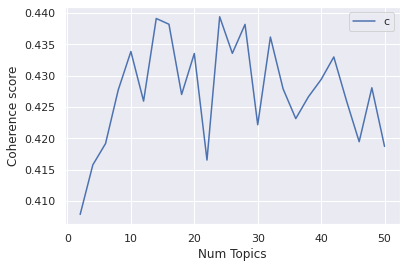

In [ ]:
limit=51; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for m, cv in zip(x, coherence_values):
   print("Num Topics =", m, " is having Coherence Value of", round(cv, 4))

Num Topics = 2  is having Coherence Value of 0.4079
Num Topics = 4  is having Coherence Value of 0.4158
Num Topics = 6  is having Coherence Value of 0.4192
Num Topics = 8  is having Coherence Value of 0.4277
Num Topics = 10  is having Coherence Value of 0.4338
Num Topics = 12  is having Coherence Value of 0.4259
Num Topics = 14  is having Coherence Value of 0.4391
Num Topics = 16  is having Coherence Value of 0.4382
Num Topics = 18  is having Coherence Value of 0.427
Num Topics = 20  is having Coherence Value of 0.4335
Num Topics = 22  is having Coherence Value of 0.4165
Num Topics = 24  is having Coherence Value of 0.4394
Num Topics = 26  is having Coherence Value of 0.4335
Num Topics = 28  is having Coherence Value of 0.4382
Num Topics = 30  is having Coherence Value of 0.4222
Num Topics = 32  is having Coherence Value of 0.4361
Num Topics = 34  is having Coherence Value of 0.4279
Num Topics = 36  is having Coherence Value of 0.4231
Num Topics = 38  is having Coherence Value of 0.426

In [ ]:
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.033*"study" + 0.029*"service" + 0.024*"customer" + 0.022*"effect" + '
  '0.020*"relationship" + 0.017*"result" + 0.017*"influence" + '
  '0.015*"satisfaction" + 0.014*"employee" + 0.014*"model"'),
 (1,
  '0.047*"tourism" + 0.035*"tourist" + 0.028*"destination" + '
  '0.020*"experience" + 0.016*"travel" + 0.012*"development" + 0.010*"paper" + '
  '0.010*"visitor" + 0.009*"explore" + 0.009*"local"'),
 (2,
  '0.034*"study" + 0.031*"hotel" + 0.026*"research" + 0.015*"provide" + '
  '0.013*"analysis" + 0.013*"finding" + 0.012*"approach" + 0.011*"industry" + '
  '0.011*"identify" + 0.010*"management"'),
 (3,
  '0.023*"tourism" + 0.012*"result" + 0.011*"impact" + 0.010*"model" + '
  '0.009*"economic" + 0.009*"increase" + 0.008*"country" + 0.008*"time" + '
  '0.008*"show" + 0.008*"change"')]


### Finding dominant topics in sentences

Finding dominant topics in sentences is one of the most useful practical applications of topic modeling. It determines what topic a given document is about. Here, we will find that topic number which has the highest percentage contribution in that particular document. In order to aggregate the information in a table, we will be creating a function named dominant_topics()

In [ ]:
def dominant_topics(ldamodel=lda_model, corpus=corpus, texts=papers):
  sent_topics_df = pd.DataFrame()
   
  for i, row in enumerate(ldamodel[corpus]):
    row = sorted(row, key=lambda x: (x[1]), reverse=True)

    for j, (topic_num, prop_topic) in enumerate(row):
      if j == 0: # => dominant topic
        wp = ldamodel.show_topic(topic_num)
        topic_keywords = ", ".join([word for word, prop in wp])
        sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
      else:
        break

  sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
  contents = pd.Series(texts)
  sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)

  return(sent_topics_df)



In [ ]:
df_topic_sents_keywords = dominant_topics(ldamodel=optimal_model, corpus=corpus, texts=papers)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
df_dominant_topic = df_topic_sents_keywords.reset_index()

df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

In [ ]:
df_dominant_topic.head(15)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.4098,"study, hotel, research, provide, analysis, fin...",PURPOSE THIS ARTICLE EXAMINES THE NEW PHENOMEN...
1,1,0.0,0.3535,"study, service, customer, effect, relationship...",PURPOSE EMPLOYEE WELLNESS IS VITAL TO CREATING...
2,2,0.0,0.3124,"study, service, customer, effect, relationship...",PURPOSE TO INVESTIGATE IF ONLINE TV CONTENT PL...
3,3,0.0,0.3507,"study, service, customer, effect, relationship...",PURPOSE RESPONDING TO AN INCREASING CALL FOR A...
4,4,2.0,0.3847,"study, hotel, research, provide, analysis, fin...",PURPOSE THE PURPOSE OF THIS STUDY IS TO IDENTI...
5,5,2.0,0.4493,"study, hotel, research, provide, analysis, fin...",PURPOSE ALTHOUGH SOCIAL MEDIA USE HAS BECOME A...
6,6,0.0,0.3465,"study, service, customer, effect, relationship...",PURPOSE THE PURPOSE OF THIS PAPER IS TO CONSID...
7,7,0.0,0.5343,"study, service, customer, effect, relationship...",PURPOSE THIS STUDY AIMS TO INVESTIGATE BYSTAND...
8,8,1.0,0.3496,"tourism, tourist, destination, experience, tra...",PURPOSE THIS PAPER CONSIDERS THE QUESTION: WHA...
9,9,0.0,0.5035,"study, service, customer, effect, relationship...",PURPOSE BRANDS ARE INCREASINGLY CONSIDERING TH...


In [ ]:
papers[0]

'PURPOSE THIS ARTICLE EXAMINES THE NEW PHENOMENON OF THE CONVERGENCE OF PLATFORM AND PIPELINE BUSINESS MODELS. IT EXAMINES THE POTENTIAL SYNERGIES AND CHALLENGES FOR PLATFORMS TO ADD PIPELINE COMPONENTS AND VICE VERSA FOR PIPELINE BUSINESSES. DESIGN/METHODOLOGY/APPROACH THIS PAPER USES A CONCEPTUAL APPROACH THAT SYNTHESIZES AND INTEGRATES THE LITERATURE FROM SERVICE, HOSPITALITY, AND STRATEGY, AND SUPPLEMENTS THEM WITH TWO ILLUSTRATIVE MINI-CASE STUDIES. FINDINGS WHILE THE EXTANT LITERATURE TYPICALLY FOCUSES ON THE DICHOTOMY BETWEEN INCUMBENT PIPELINE BUSINESSES THAT CREATE VALUE BY CONTROLLING A LINEAR SERIES OF ACTIVITIES AND NETWORK EFFECTS-DRIVEN PLATFORMS, WE DIFFERENTIATE BETWEEN TWO TYPES OF PLATFORM BUSINESS MODELS (I.E. PLATFORMS WITH ASSET CONTROL AND PLATFORMS WITH PEER-PROVIDED ASSETS). FURTHER, WE IDENTIFY THREE COMMON PATHWAYS OF CONVERGENCE; THAT IS, PIPELINES MOVING TOWARDS (1) PLATFORMS WITH ASSET CONTROL AND (2) THOSE WITH PEER-PROVIDED ASSETS, AND (3) PLATFORMS WITH 

In [ ]:
a = df_dominant_topic.Keywords.values

In [ ]:
a

array(['study, hotel, research, provide, analysis, finding, approach, industry, identify, management',
       'study, service, customer, effect, relationship, result, influence, satisfaction, employee, model',
       'study, service, customer, effect, relationship, result, influence, satisfaction, employee, model',
       ...,
       'tourism, result, impact, model, economic, increase, country, time, show, change',
       'tourism, tourist, destination, experience, travel, development, paper, visitor, explore, local',
       'tourism, tourist, destination, experience, travel, development, paper, visitor, explore, local'],
      dtype=object)

In [ ]:
a[0]

'study, hotel, research, provide, analysis, finding, approach, industry, identify, management'

In [ ]:
for n in a[0].split(','):
  if n in papers[0]:
    print(n)


In [ ]:
for n in a[3].split(','):
  if n in papers[3:5]:
    print(n)

### Finding Most Representative Document

In order to understand more about the topic, we can also find the documents, a given topic has contributed to the most. We can infer that topic by reading that particular document(s).

In [ ]:
sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')
for i, grp in sent_topics_outdf_grpd:
   sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], axis=0)

sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)
sent_topics_sorteddf_mallet.columns = ['Topic_Number', "Contribution_Perc", "Keywords", "Text"]

sent_topics_sorteddf_mallet.head()

,Topic_Number,Contribution_Perc,Keywords,Text
0,0.0,0.6878,"study, service, customer, effect, relationship...",PURPOSE - THIS PAPER AIMS TO EXAMINE THE JOINT...
1,1.0,0.6263,"tourism, tourist, destination, experience, tra...","THIS PAPER ENGAGES THE ""CULTURE GAP"" IN THE SU..."
2,2.0,0.6726,"study, hotel, research, provide, analysis, fin...",PURPOSE - THE PURPOSE OF THIS STUDY IS TO PROV...
3,3.0,0.6592,"tourism, result, impact, model, economic, incr...",THIS STUDY PRESENTS AN ANALYSIS OF CROSS-BORDE...


### Volume & Distribution of Topics
Sometimes we also want to judge how widely the topic is discussed in documents. For this we need to understand the volume and distribution of topics across the documents.

First calculate the number of documents for every Topic as follows

In [ ]:
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

Next, calculate the percentage of Documents for every Topic as follows −;

In [ ]:
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

Now find the topic Number and Keywords as follows −

In [ ]:
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

Now, concatenate then Column wise as follows −

In [ ]:
df_dominant_topics = pd.concat(
   [topic_num_keywords, topic_counts, topic_contribution], axis=1
)

Next, we will change the Column names as follows −

In [ ]:
df_dominant_topics.columns = [
   'Dominant-Topic', 'Topic-Keywords', 'Num_Documents', 'Perc_Documents'
]
df_dominant_topics

,Dominant-Topic,Topic-Keywords,Num_Documents,Perc_Documents
0.0,2.0,"study, hotel, research, provide, analysis, fin...",2972.0,0.2610
1.0,0.0,"study, service, customer, effect, relationship...",3336.0,0.2930
2.0,0.0,"study, service, customer, effect, relationship...",2482.0,0.2180
3.0,0.0,"study, service, customer, effect, relationship...",2595.0,0.2279
4.0,2.0,"study, hotel, research, provide, analysis, fin...",NaN,NaN
...,...,...,...,...
11380.0,2.0,"study, hotel, research, provide, analysis, fin...",NaN,NaN
11381.0,1.0,"tourism, tourist, destination, experience, tra...",NaN,NaN
11382.0,3.0,"tourism, result, impact, model, economic, incr...",NaN,NaN
11383.0,1.0,"tourism, tourist, destination, experience, tra...",NaN,NaN


Source: https://www.tutorialspoint.com/gensim/gensim_documents_and_lda_model.htm